In [1]:
import numpy as np
import pandas as pd
import string
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [3]:
dataset=pd.read_csv("Elon_musk.csv",encoding='cp1252')
dataset

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
dataset.Text

0                                  @kunalb11 I’m an alien
1       @ID_AA_Carmack Ray tracing on Cyberpunk with H...
2                     @joerogan @Spotify Great interview!
3                         @gtera27 Doge is underestimated
4       @teslacn Congratulations Tesla China for amazi...
                              ...                        
1994    @flcnhvy True, it sounds so surreal, but the n...
1995    @PPathole Make sure to read ur terms &amp; con...
1996                  @TeslaGong @PPathole Samwise Gamgee
1997    @PPathole Altho Dumb and Dumber is <U+0001F525...
1998                            Progress update August 28
Name: Text, Length: 1999, dtype: object

In [5]:
dataset = [x.strip() for x in dataset['Text']]
dataset = [x for x in dataset if x]
dataset[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [7]:
##part of speech tagging

nlp = spacy.load('en_core_web_sm')

one_block = dataset[2]
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent', jupyter=True)

C:\anaconda3\lib\site-packages\spacy\displacy\__init__.py:189: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


In [8]:
one_block

'@joerogan @Spotify Great interview!'

In [10]:
for token in doc_block[0:20]:
    print(token, token.pos)

@joerogan 96
@Spotify 100
Great 84
interview 92
! 97


In [12]:
# filtrring for nouns and verbs only

nouns_verbs = [token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[5:25])

[]


In [15]:
#counting tokens agaun
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

X = cv.fit_transform(nouns_verbs)
sum_words = X.sum(axis=0)
word_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(word_freq, key = lambda x: x[1], reverse=True)
wf_df =pd.DataFrame(words_freq)
wf_df.columns=['word', 'count']

wf_df[0:10]


,word,count
0,spotify,1
1,interview,1


<AxesSubplot:title={'center':'Top verbs ans nouns'}, xlabel='word'>

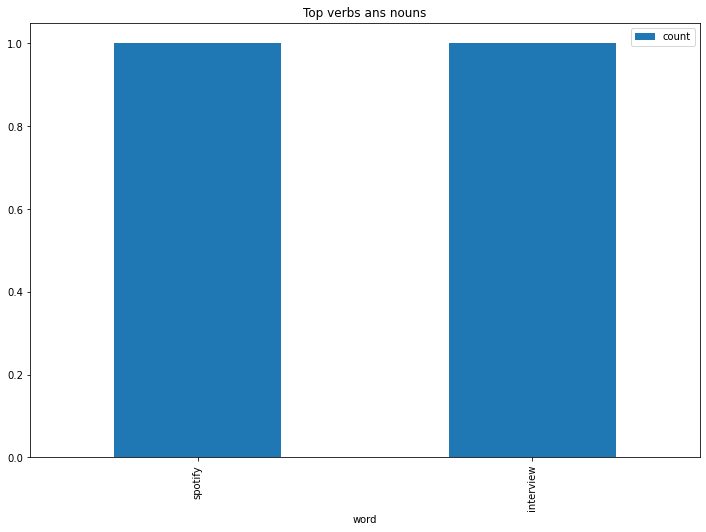

In [16]:
#visualzing
wf_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs ans nouns')

In [19]:
#Emotion mining

afinn = pd.read_csv('Afinn.csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [22]:
import numpy as np
import pandas as pd
import string 
import spacy

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

import pandas
data = pd.read_csv("Elon_musk.csv",error_bad_lines=False,encoding='cp1252')
data= [x.strip() for x in data.Text]
data = [x for x in data if x]

In [23]:
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[5:15]

['Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O @freewalletorg Any crypto wallet that won’t give you your private keys should be avoided at all costs @freewalletorg Your app sucks RT @SpaceX: NASA has selected Falcon Heavy to launch the first two elements o

In [24]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can’t b… ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [38]:
affinity_scores = afinn.set_index('word')['value'].to_dict()

In [42]:
# calculate score
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str =None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [43]:
# test that it works
calculate_sentiment(text = 'interview')

0

In [44]:
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)

In [45]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [46]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,word_count,sentiment_value
846,Impressive Tianwen-1 Mars rover mission launch...,103,10
808,Might be able to… https://t.co/FB7e5nOq2E @Pri...,72,11
222,"@PPathole @karpathy For a second there, I thou...",69,11
182,"Also, w… https://t.co/IYdKttVsqk @cleantechnic...",99,12
638,It’s… https://t.co/IxhyT6NuiC @Teslarati Tesla...,65,13
80,@teslaownersSV This is a good one @MrBeastYT I...,38,13
578,The “open” areas… https://t.co/rabjKrtQlw @Sav...,138,14
710,We just haven’t observed the… https://t.co/mez...,72,15
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",231,15
104,@Erdayastronaut @SpaceX Was also thinking that...,94,16


In [47]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    914.000000
mean       1.373085
std        2.687397
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [48]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head()

,sentence,word_count,sentiment_value
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,13,0
1,Have you tried it?,4,0
4,Now on to the next for even more!!,8,0
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,14,-2
8,Tweets definitely do not represent real-world ...,8,0


In [50]:
sent_df[sent_df['sentiment_value']>=10].head()

,sentence,word_count,sentiment_value
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",231,15
80,@teslaownersSV This is a good one @MrBeastYT I...,38,13
104,@Erdayastronaut @SpaceX Was also thinking that...,94,16
157,@harsimranbansal @heydave7 It will most likely...,93,10
181,There’s some great AI out ther… https://t.co/v...,48,10


In [51]:
sent_df['index']=range(0,len(sent_df))

C:\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

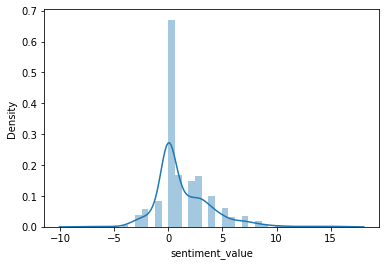

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

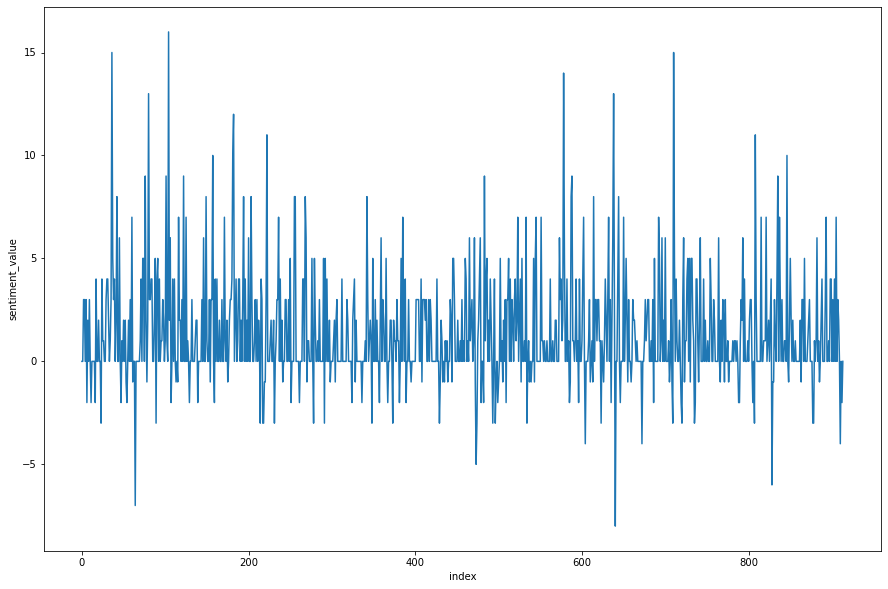

In [53]:
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

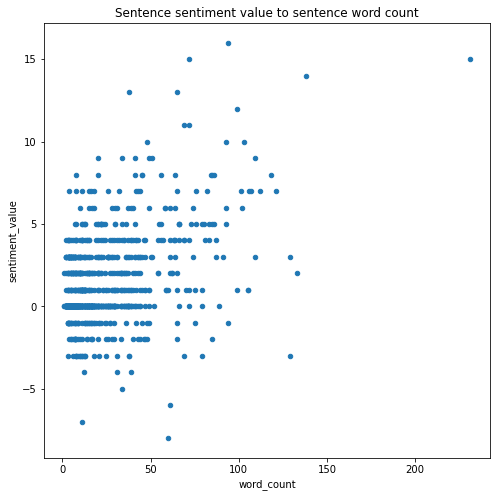

In [54]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')